# Primeiro Kernel

In [1]:
# lendo libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv(r'C:\Users\user\Desktop\Python Files\fifa-20-complete-player-datasets\FIFAdatas.csv')

In [3]:
dados.describe()

,ID,Overall,Potential,Total_Point
count,18000.000000,18000.000000,18000.000000,18000.000000
mean,236824.094778,75.557444,87.381556,1868.602778
std,10164.973687,5.588599,2.925083,147.536463
min,158023.000000,62.000000,80.000000,1205.000000
25%,231747.000000,72.000000,86.000000,1761.000000
50%,238160.000000,76.000000,88.000000,1860.000000
75%,243812.000000,79.000000,89.000000,1993.000000
max,253004.000000,94.000000,95.000000,2255.000000


In [4]:
# vamos ver o tamanho da tabela - 18000 linhas e 13 colunas
dados.shape

(18000, 13)

In [5]:
# verificando se há dados duplicados
dados.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17995     True
17996     True
17997     True
17998     True
17999     True
Length: 18000, dtype: bool

In [6]:
# excluindo dados duplicados
dados = dados.drop_duplicates()

In [7]:
dados.head()

,ID,picture,Flag,Name,Age,Position,Overall,Potential,Team_Image,Team,Value,Wage,Total_Point
0,237692,https://cdn.sofifa.org/players/4/20/237692.png,https://cdn.sofifa.org/flags/14.png,P. Foden,['19'],CAM,76,89,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,€14.5M,€52K,1881
1,212188,https://cdn.sofifa.org/players/4/20/212188.png,https://cdn.sofifa.org/flags/21.png,T. Werner,['23'],ST,84,88,https://cdn.sofifa.org/teams/2/light/112172.png,RB Leipzig,€41M,€77K,1983
2,239085,https://cdn.sofifa.org/players/4/20/239085.png,https://cdn.sofifa.org/flags/36.png,E. Håland,['18'],ST,78,89,https://cdn.sofifa.org/teams/2/light/191.png,FC Red Bull Salzburg,€16.5M,€17K,1897
3,248243,https://cdn.sofifa.org/players/4/20/248243.png,https://cdn.sofifa.org/flags/18.png,E. Camavinga,['16'],CM,70,90,https://cdn.sofifa.org/teams/2/light/74.png,Stade Rennais FC,€3.5M,€3K,1879
4,238160,https://cdn.sofifa.org/players/4/20/238160.png,https://cdn.sofifa.org/flags/48.png,M. Demiral,['21'],CB,74,85,https://cdn.sofifa.org/teams/2/light/45.png,Juventus,€9M,€45K,1651


In [8]:
# observando o describe vimos que temos que alterar os dados de AGE, WAGE e Value
# vamos primeiro ajustar os valores da Coluna Age
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 13 columns):
ID             120 non-null int64
picture        120 non-null object
Flag           120 non-null object
Name           120 non-null object
Age            120 non-null object
Position       120 non-null object
Overall        120 non-null int64
Potential      120 non-null int64
Team_Image     120 non-null object
Team           120 non-null object
Value          120 non-null object
Wage           120 non-null object
Total_Point    120 non-null int64
dtypes: int64(4), object(9)
memory usage: 13.1+ KB


In [9]:
dados.head()

,ID,picture,Flag,Name,Age,Position,Overall,Potential,Team_Image,Team,Value,Wage,Total_Point
0,237692,https://cdn.sofifa.org/players/4/20/237692.png,https://cdn.sofifa.org/flags/14.png,P. Foden,['19'],CAM,76,89,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,€14.5M,€52K,1881
1,212188,https://cdn.sofifa.org/players/4/20/212188.png,https://cdn.sofifa.org/flags/21.png,T. Werner,['23'],ST,84,88,https://cdn.sofifa.org/teams/2/light/112172.png,RB Leipzig,€41M,€77K,1983
2,239085,https://cdn.sofifa.org/players/4/20/239085.png,https://cdn.sofifa.org/flags/36.png,E. Håland,['18'],ST,78,89,https://cdn.sofifa.org/teams/2/light/191.png,FC Red Bull Salzburg,€16.5M,€17K,1897
3,248243,https://cdn.sofifa.org/players/4/20/248243.png,https://cdn.sofifa.org/flags/18.png,E. Camavinga,['16'],CM,70,90,https://cdn.sofifa.org/teams/2/light/74.png,Stade Rennais FC,€3.5M,€3K,1879
4,238160,https://cdn.sofifa.org/players/4/20/238160.png,https://cdn.sofifa.org/flags/48.png,M. Demiral,['21'],CB,74,85,https://cdn.sofifa.org/teams/2/light/45.png,Juventus,€9M,€45K,1651


In [10]:
# convertendo para string depois convertendo para num
def Age_num(df_age):
    try:
        age = float(df_age[2:-2])
    except ValueError:
        age = NaN
    return age   
dados['Age_Num'] = dados['Age'].apply(Age_num)
print(dados['Age_Num'])

0      19.0
1      23.0
2      18.0
3      16.0
4      21.0
       ... 
115    19.0
116    22.0
117    24.0
118    21.0
119    20.0
Name: Age_Num, Length: 120, dtype: float64


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 14 columns):
ID             120 non-null int64
picture        120 non-null object
Flag           120 non-null object
Name           120 non-null object
Age            120 non-null object
Position       120 non-null object
Overall        120 non-null int64
Potential      120 non-null int64
Team_Image     120 non-null object
Team           120 non-null object
Value          120 non-null object
Wage           120 non-null object
Total_Point    120 non-null int64
Age_Num        120 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 14.1+ KB


In [12]:
# agora precisamos ajeitar o wage e value
def extract_wages(x):
    out = x.replace('€','')
    if 'K' in out:
        out = float(out.replace('K',''))*1000
    elif 'M' in out:
        out = float(out.replace('M',''))*100000
    return float(out)

In [13]:
# utilizando a funçao
dados['Wage_num'] = dados['Wage'].apply(lambda x: extract_wages(x))
dados.head()

,ID,picture,Flag,Name,Age,Position,Overall,Potential,Team_Image,Team,Value,Wage,Total_Point,Age_Num,Wage_num
0,237692,https://cdn.sofifa.org/players/4/20/237692.png,https://cdn.sofifa.org/flags/14.png,P. Foden,['19'],CAM,76,89,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,€14.5M,€52K,1881,19.0,52000.0
1,212188,https://cdn.sofifa.org/players/4/20/212188.png,https://cdn.sofifa.org/flags/21.png,T. Werner,['23'],ST,84,88,https://cdn.sofifa.org/teams/2/light/112172.png,RB Leipzig,€41M,€77K,1983,23.0,77000.0
2,239085,https://cdn.sofifa.org/players/4/20/239085.png,https://cdn.sofifa.org/flags/36.png,E. Håland,['18'],ST,78,89,https://cdn.sofifa.org/teams/2/light/191.png,FC Red Bull Salzburg,€16.5M,€17K,1897,18.0,17000.0
3,248243,https://cdn.sofifa.org/players/4/20/248243.png,https://cdn.sofifa.org/flags/18.png,E. Camavinga,['16'],CM,70,90,https://cdn.sofifa.org/teams/2/light/74.png,Stade Rennais FC,€3.5M,€3K,1879,16.0,3000.0
4,238160,https://cdn.sofifa.org/players/4/20/238160.png,https://cdn.sofifa.org/flags/48.png,M. Demiral,['21'],CB,74,85,https://cdn.sofifa.org/teams/2/light/45.png,Juventus,€9M,€45K,1651,21.0,45000.0


In [14]:
dados['Value_num'] = dados['Value'].apply(lambda x: extract_wages(x))
dados.head()

,ID,picture,Flag,Name,Age,Position,Overall,Potential,Team_Image,Team,Value,Wage,Total_Point,Age_Num,Wage_num,Value_num
0,237692,https://cdn.sofifa.org/players/4/20/237692.png,https://cdn.sofifa.org/flags/14.png,P. Foden,['19'],CAM,76,89,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,€14.5M,€52K,1881,19.0,52000.0,1450000.0
1,212188,https://cdn.sofifa.org/players/4/20/212188.png,https://cdn.sofifa.org/flags/21.png,T. Werner,['23'],ST,84,88,https://cdn.sofifa.org/teams/2/light/112172.png,RB Leipzig,€41M,€77K,1983,23.0,77000.0,4100000.0
2,239085,https://cdn.sofifa.org/players/4/20/239085.png,https://cdn.sofifa.org/flags/36.png,E. Håland,['18'],ST,78,89,https://cdn.sofifa.org/teams/2/light/191.png,FC Red Bull Salzburg,€16.5M,€17K,1897,18.0,17000.0,1650000.0
3,248243,https://cdn.sofifa.org/players/4/20/248243.png,https://cdn.sofifa.org/flags/18.png,E. Camavinga,['16'],CM,70,90,https://cdn.sofifa.org/teams/2/light/74.png,Stade Rennais FC,€3.5M,€3K,1879,16.0,3000.0,350000.0
4,238160,https://cdn.sofifa.org/players/4/20/238160.png,https://cdn.sofifa.org/flags/48.png,M. Demiral,['21'],CB,74,85,https://cdn.sofifa.org/teams/2/light/45.png,Juventus,€9M,€45K,1651,21.0,45000.0,900000.0


In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 16 columns):
ID             120 non-null int64
picture        120 non-null object
Flag           120 non-null object
Name           120 non-null object
Age            120 non-null object
Position       120 non-null object
Overall        120 non-null int64
Potential      120 non-null int64
Team_Image     120 non-null object
Team           120 non-null object
Value          120 non-null object
Wage           120 non-null object
Total_Point    120 non-null int64
Age_Num        120 non-null float64
Wage_num       120 non-null float64
Value_num      120 non-null float64
dtypes: float64(3), int64(4), object(9)
memory usage: 15.9+ KB


Text(0.5, 1.0, 'Valor das posições no futebol')

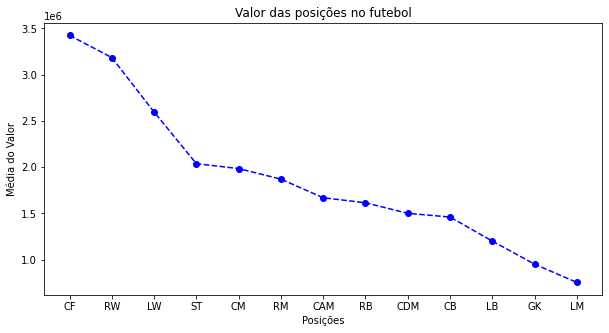

In [16]:
# vamos ver quais são os jogadores mais caros por posição
fig = plt.figure(figsize = (10,5))
plt.plot(dados.groupby('Position')['Value_num'].mean().sort_values(ascending = False),'--bo')
plt.xlabel('Posições')
plt.ylabel('Média do Valor')
plt.title('Valor das posições no futebol')

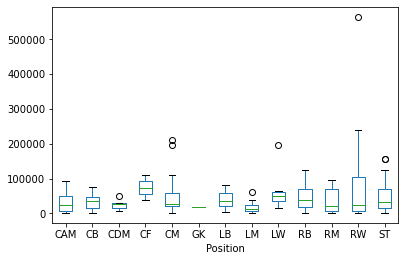

In [17]:
#testando o boxplot
# vamos ver a distribuiçao dos salarios por posiçao de jogo
# vemos que possuem muito outliers, provavelmente devem ser o neymar, cr7 e messi
dados.boxplot(column = 'Wage_num', by = 'Position');
plt.title('')
plt.suptitle('')
plt.grid('')

In [18]:
dados.sort_values(by = 'Wage_num', ascending= False).head()

,ID,picture,Flag,Name,Age,Position,Overall,Potential,Team_Image,Team,Value,Wage,Total_Point,Age_Num,Wage_num,Value_num
90,158023,https://cdn.sofifa.org/players/4/20/158023.png,https://cdn.sofifa.org/flags/52.png,L. Messi,['32'],RW,94,94,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona,€95.5M,€565K,2255,32.0,565000.0,9550000.0
101,209331,https://cdn.sofifa.org/players/4/20/209331.png,https://cdn.sofifa.org/flags/111.png,M. Salah,['27'],RW,90,90,https://cdn.sofifa.org/teams/2/light/9.png,Liverpool,€80.5M,€240K,2207,27.0,240000.0,8050000.0
52,228702,https://cdn.sofifa.org/players/4/20/228702.png,https://cdn.sofifa.org/flags/34.png,F. de Jong,['22'],CM,86,92,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona,€60M,€210K,2193,22.0,210000.0,6000000.0
94,222492,https://cdn.sofifa.org/players/4/20/222492.png,https://cdn.sofifa.org/flags/21.png,L. Sané,['23'],LW,86,92,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City,€61M,€195K,2103,23.0,195000.0,6100000.0
116,230658,https://cdn.sofifa.org/players/4/20/230658.png,https://cdn.sofifa.org/flags/54.png,Arthur,['22'],CM,85,90,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona,€50.5M,€195K,2164,22.0,195000.0,5050000.0


Text(0, 0.5, 'Overall')

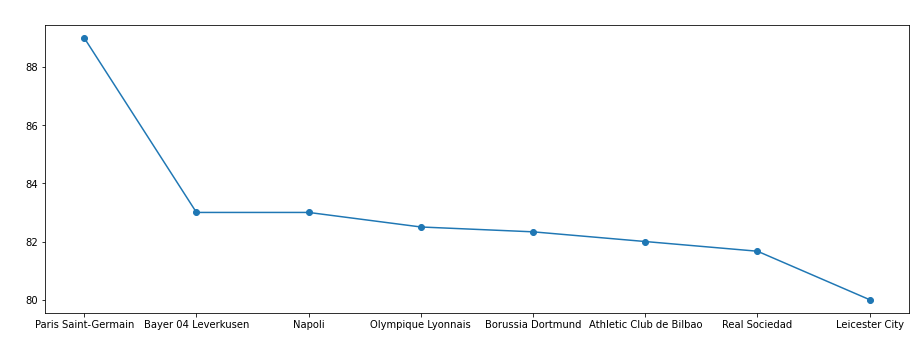

In [19]:
# vamos pegar os times que possuem maior média de  Overall
fig = plt.figure(figsize = (12,10));
ax = fig.add_axes([0.1, .1, 1, 0.4]);
plt.plot(dados.groupby('Team')['Overall'].mean().sort_values(ascending = False).head(8),'-o');
plt.title('Overall dos tops 8 times do FIFA 20', fontsize = 16, color = 'w')
plt.xlabel('Clubes', fontsize = 14, color = 'w')
plt.ylabel('Overall', fontsize=  14, color = 'w')


In [20]:
# real sociedad não é tao famoso assim, porem so temos 3 jogadores
dados[dados['Team'] == 'Real Sociedad']

,ID,picture,Flag,Name,Age,Position,Overall,Potential,Team_Image,Team,Value,Wage,Total_Point,Age_Num,Wage_num,Value_num
15,222665,https://cdn.sofifa.org/players/4/20/222665.png,https://cdn.sofifa.org/flags/36.png,M. Ødegaard,['20'],CAM,82,88,https://cdn.sofifa.org/teams/2/light/457.png,Real Sociedad,€30.5M,€30K,2075,20.0,30000.0,3050000.0
49,230142,https://cdn.sofifa.org/players/4/20/230142.png,https://cdn.sofifa.org/flags/45.png,Oyarzabal,['22'],LW,83,89,https://cdn.sofifa.org/teams/2/light/457.png,Real Sociedad,€35.5M,€42K,1993,22.0,42000.0,3550000.0
112,225193,https://cdn.sofifa.org/players/4/20/225193.png,https://cdn.sofifa.org/flags/45.png,Merino,['23'],CM,80,88,https://cdn.sofifa.org/teams/2/light/457.png,Real Sociedad,€21.5M,€30K,2121,23.0,30000.0,2150000.0


In [21]:
# vamos plotar times onde pelo menos temos 3 jogadores listad
# criei um novo objeto com os valores de counts de team
# depois fiz o filtro de somente trazer times com mais ou = a 3 de contagem
# no final peguei o data fram fiz o group by de times com >= 3 jogadores pela média do overall
counts_team = dados['Team'].value_counts().sort_values(ascending = False)
counts_team[counts_team >= 3]

group_by_filter = pd.DataFrame(dados[dados['Team'].isin(counts_team[counts_team >3].index)].groupby('Team')['Overall'].mean().sort_values(ascending = False))


In [22]:
# está tudo em índice, temos que resetar o índice
group_by_filter = group_by_filter.reset_index()

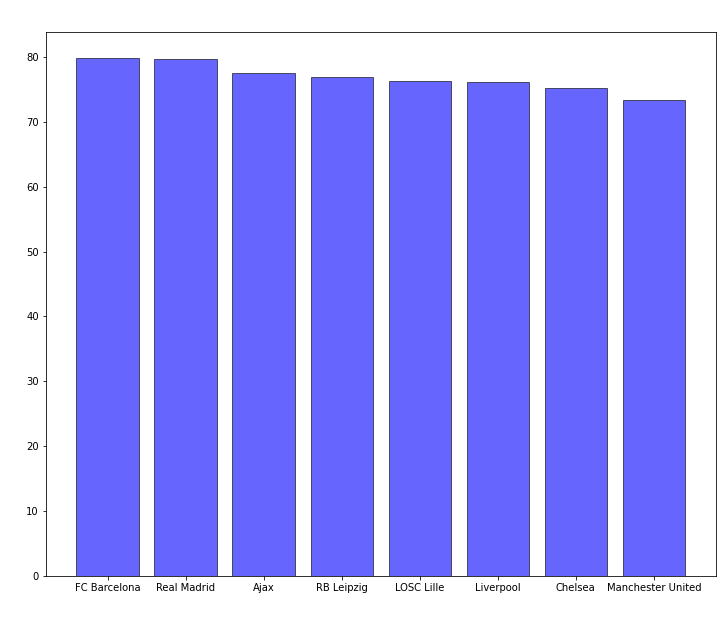

In [24]:
# Neste gráfico podemos ver quais são os clubes com os melhores jogadores
fig = plt.figure(figsize = (12,10));
plt.bar(x = group_by_filter['Team'], height = group_by_filter['Overall'],
        color = 'blue',
        width = 0.8,
        alpha = 0.6,
        edgecolor = 'black')
plt.title('Top clubes com o maior overall',fontsize = 24, color = 'w');

plt.xlabel('Clubes',fontsize = 16, color = 'w');
plt.ylabel('Overall',fontsize = 16, color = 'w');
